<a href="https://colab.research.google.com/github/ChennyTech/TensorflowStudyExample/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [5/60], Loss: 30.1238
Epoch [10/60], Loss: 12.4813
Epoch [15/60], Loss: 5.3336
Epoch [20/60], Loss: 2.4375
Epoch [25/60], Loss: 1.2638
Epoch [30/60], Loss: 0.7878
Epoch [35/60], Loss: 0.5946
Epoch [40/60], Loss: 0.5158
Epoch [45/60], Loss: 0.4835
Epoch [50/60], Loss: 0.4699
Epoch [55/60], Loss: 0.4640
Epoch [60/60], Loss: 0.4612


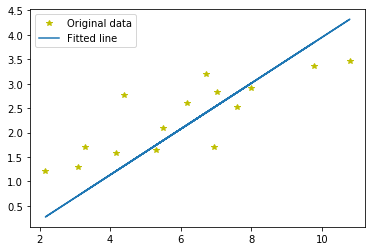

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size) # feature 수

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets) # output이 예측, target이 실제 값
    
    # Backward and optimize
    optimizer.zero_grad() # gradient reset 필요, 계속 누적되기 때문
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy() #.detach()는 .item() 같은 것, numpy는 tensor to numpy array로
# 과제 1 https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(x_train, y_train, 'y*', label='Original data') # ro는 red o # [color][marker][line]
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt') # weight랑 bias가 metadata로 저장 됨

In [0]:
print(model.state_dict())

OrderedDict([('weight', tensor([[0.4688]])), ('bias', tensor([-0.7423]))])


In [0]:
# 과제2
model2 = nn.Linear(input_size, output_size)
print(model2.state_dict()) # random하게 나옴
model2.load_state_dict(torch.load('model.ckpt'))
print(model2.state_dict()['weight']) # 저장된 값이 나옴

OrderedDict([('weight', tensor([[-0.7830]])), ('bias', tensor([-0.1994]))])
tensor([[0.4688]])


In [0]:
# 과제3 torch.max
t= torch.tensor([[1,2,5,6,7,8],[4,1,2,5,6,5],[1,2,5,6,7,1],[10,0,1,2,5,6]])
torch.max(t,0) # 없으면 전체 중/ -1, 1 이면 각 row 별/ -2, 0이면 각 column별,  

torch.return_types.max(values=tensor([10,  2,  5,  6,  7,  8]), indices=tensor([3, 2, 2, 2, 2, 0]))